In [2]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from utilsBaricentricNeuralNetwork import *

In [5]:
# Define the values and its image
a = 1.0
b = 3.0
f_a = 2.0
f_b = 4.0

# Normalizar entrada t = (x - b) / (a - b)
def compute_t(x):
    return (a - x) / (a - b)

def custom_activation_h1(x):
    neuron_1 = tf.nn.relu(x[:, 0])  # Primera neurona usa ReLU
    neuron_2 = tf.cast(x[:, 1] > 0, dtype=tf.float32)  # Segunda neurona usa Step
    neuron_3 = tf.cast(x[:, 2] > 0, dtype=tf.float32)  # Tercera neurona usa Step
    neuron_4 = tf.nn.relu(x[:, 3])  # Cuarta neurona usa ReLU
    return tf.stack([neuron_1, neuron_2, neuron_3, neuron_4], axis=1)
    
# Define the model as option 1
modelKeras = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,),name="Input"),
    tf.keras.layers.Lambda(compute_t,name="Compute_t"),
    tf.keras.layers.Dense(4, activation=None,
                       kernel_initializer=tf.constant_initializer([[1], 
                                                                   [-1], 
                                                                   [1], 
                                                                   [-1]]),
                       bias_initializer=tf.constant_initializer([0, 0, -1, 1]),name="H1"),
    tf.keras.layers.Lambda(custom_activation_h1,name="ActH1"),
    tf.keras.layers.Dense(2, activation="relu",
                       kernel_initializer=tf.constant_initializer([[-1, 0], 
                                                                   [-2, -2], 
                                                                   [-2, -2],
                                                                   [0, -1]]),
                       bias_initializer=tf.constant_initializer([1, 1]),name="H2"),
    tf.keras.layers.Dense(1, activation=None,
                       kernel_initializer=tf.constant_initializer([[f_a, f_b]]),
                       bias_initializer=tf.constant_initializer([0]),name="Output")
])

x_input = np.array([[2],[1.5],[6]])
outputs = modelKeras(x_input)
print(outputs)

tf.Tensor(
[[3. ]
 [2.5]
 [0. ]], shape=(3, 1), dtype=float32)


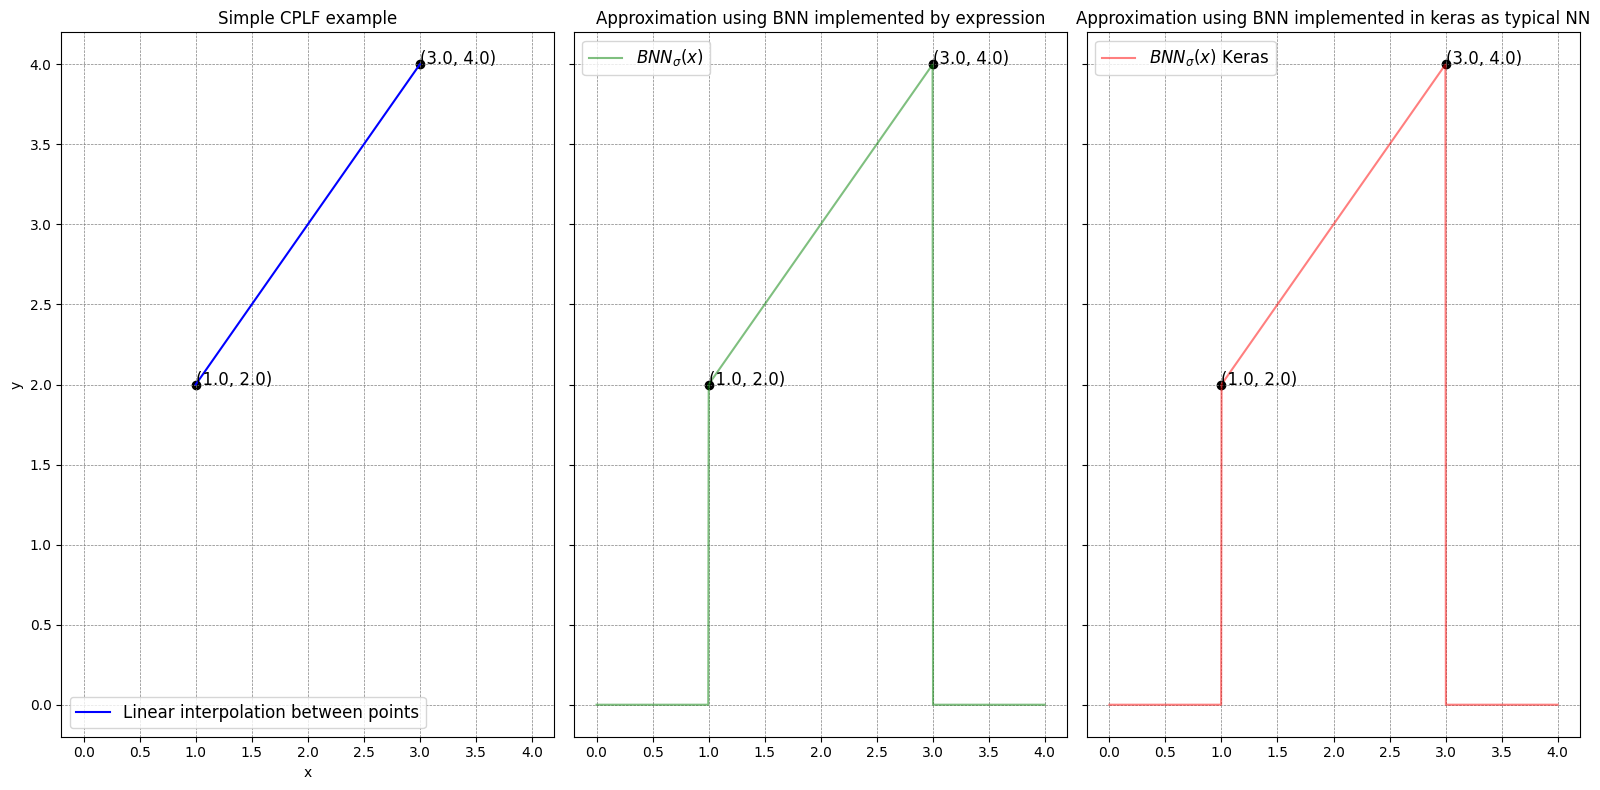

In [27]:
points = tf.constant([[1,2],[3,4]],dtype = tf.float32)
networkBNN = BaricentricSigmaNetworkTf(points)
x_valuesBNN = tf.linspace(0, 4, 1000)  
outputsBNN = networkBNN(x_valuesBNN)
outputsBNNKeras = modelKeras(x_valuesBNN)

fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True)

axs[0].plot([a, b], [f_a, f_b], 'b-', label="Linear interpolation between points")  
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("Simple CPLF example")

axs[1].plot(x_valuesBNN, outputsBNN, 'g-', label='$BNN_{\sigma}(x)$', alpha=0.5)
axs[1].set_title("Approximation using BNN implemented by expression")

axs[2].plot(x_valuesBNN, outputsBNNKeras, 'r-', label='$BNN_{\sigma}(x)$ Keras', alpha=0.5)
axs[2].set_title("Approximation using BNN implemented in keras as typical NN")

for i in range(3):
    axs[i].legend(fontsize=12)
    axs[i].scatter([a, b], [f_a, f_b], color='black')  
    axs[i].text(a, f_a, f"({a}, {f_a})", fontsize=12, color="black")
    axs[i].text(b, f_b, f"({b}, {f_b})", fontsize=12, color="black")
    axs[i].grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.tight_layout()
plt.show()